<a href="https://colab.research.google.com/github/Vijaya0869/BC_detection/blob/main/accuracy_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image, display

In [ ]:
features = pd.read_csv("/content/drive/My Drive/mammography_images/total/total.csv")
features.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
features.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,B,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,...,14.09,19.35,93.22,605.8,0.1326,0.2610,0.3476,0.09783,0.3006,0.07802


In [ ]:
features.shape

(7632, 31)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    object 
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


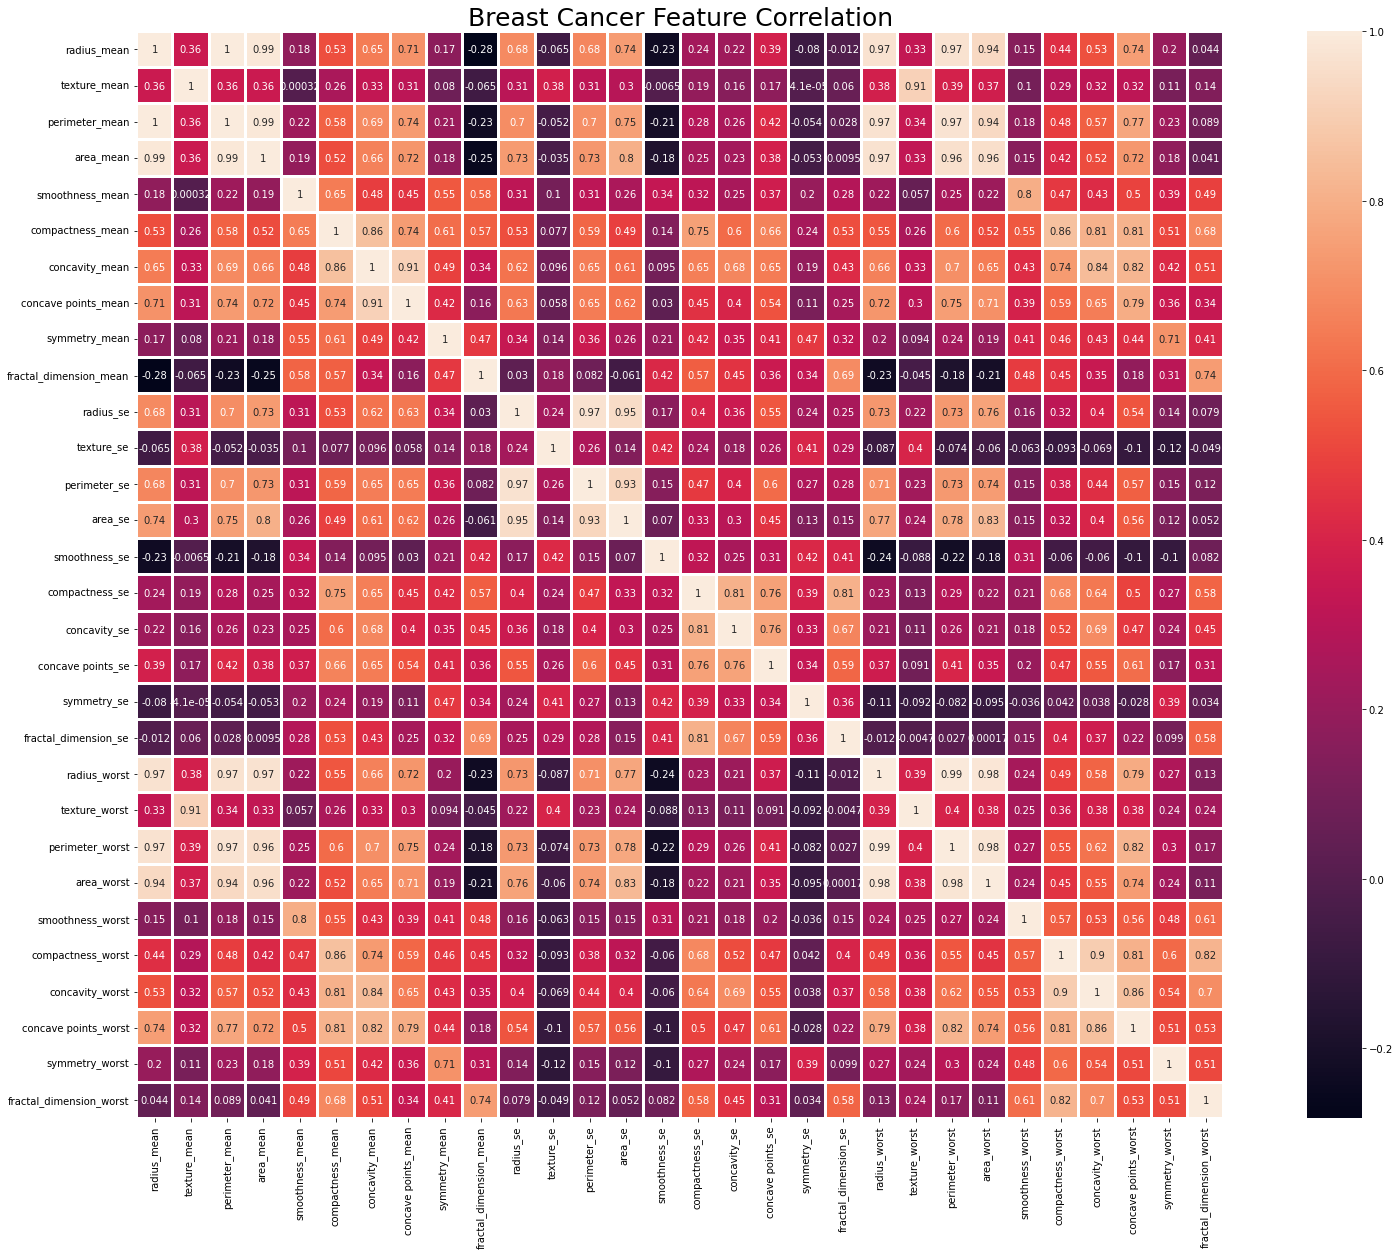

In [ ]:
plt.figure(figsize=(30, 20))
plt.title('Breast Cancer Feature Correlation', fontsize=25, ha='center')
sns.heatmap(features.corr(), annot=True, square='square', fmt='.2g',linewidths=2)

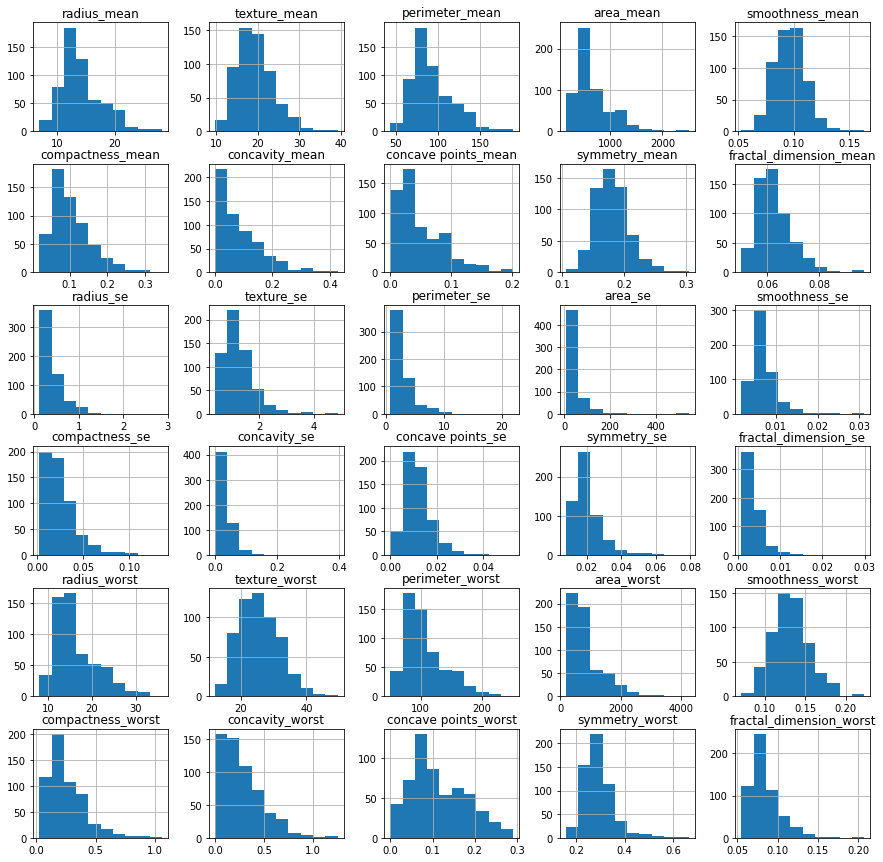

In [ ]:
features.hist(figsize = (15,15))
plt.show()

In [ ]:
#get a count ofthe number of Malignant (M) or Benign (B) cells
features.diagnosis.value_counts()

B    4689
M    2943
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


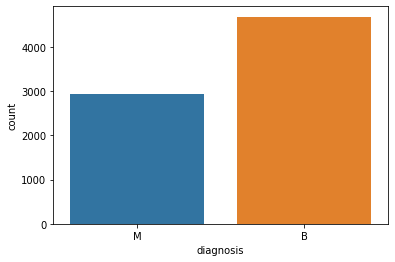

In [ ]:
#visualize the count
sns.countplot(features.diagnosis,label="count")
plt.show()

In [ ]:
#look at the data types to see which columns need to be encoded
features.dtypes

id                          object
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Split the data set into independent(x) and dependent (y) data sets
x=train_features.iloc[:,2:31].values
y=train_features.iloc[:,1].values

#split the data set into 90% training and 10% testing

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)
  
  #KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(x_train,y_train)

  #Neural networks Classifier
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
  mlp.fit(x_train,y_train)
  
  #SVM Classifier
  from sklearn.svm import SVC
  svc = SVC(kernel='rbf', random_state = 1)
  svc.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]ensemble Classifier Training Accuracy:",forest.score(x_train,y_train))
  print("[3]KNeighbours Classifier Training Accuracy:",classifier.score(x_train,y_train))
  print("[4]Neural networks Classifier Training Accuracy:",mlp.score(x_train,y_train))
  print("[5]SVM Classifier Training Accuracy:",svc.score(x_train,y_train))
  
  return log,tree,forest,classifier,mlp,svc

In [ ]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.986328125
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]ensemble Classifier Training Accuracy: 0.998046875
[3]KNeighbours Classifier Training Accuracy: 0.978515625
[4]Neural networks Classifier Training Accuracy: 0.998046875
[5]SVM Classifier Training Accuracy: 0.986328125


In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy(in %)= ", ((TP+TN) / (TP+TN+FN+FP))*100)
  print()

Model  0
[[922  24]
 [ 21 560]]
Testing Accuracy(in %)=  97.05304518664047

Model  1
[[911  35]
 [  9 572]]
Testing Accuracy(in %)=  97.11853307138179

Model  2
[[945   1]
 [  0 581]]
Testing Accuracy(in %)=  99.93451211525868

Model  3
[[946   0]
 [  0 581]]
Testing Accuracy(in %)=  100.0

Model  4
[[946   0]
 [  0 581]]
Testing Accuracy(in %)=  100.0

Model  5
[[946   0]
 [ 19 562]]
Testing Accuracy(in %)=  98.75573018991487



SVM Classifier

In [ ]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state = 1)
svc.fit(x_train,y_train)

SVC(random_state=1)

In [ ]:
y_pred = svc.predict(x_test)
print(y_pred)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M']


#split the data set into 80% training and 20% testing

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)
  
  #KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(x_train,y_train)

  #Neural networks Classifier
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
  mlp.fit(x_train,y_train)
  
  #SVM Classifier
  from sklearn.svm import SVC
  svc = SVC(kernel='rbf', random_state = 1)
  svc.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]ensemble Classifier Training Accuracy:",forest.score(x_train,y_train))
  print("[3]KNeighbours Classifier Training Accuracy:",classifier.score(x_train,y_train))
  print("[4]Neural networks Classifier Training Accuracy:",mlp.score(x_train,y_train))
  print("[5]SVM Classifier Training Accuracy:",svc.score(x_train,y_train))
  
  return log,tree,forest,classifier,mlp,svc

In [ ]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9912087912087912
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]ensemble Classifier Training Accuracy: 0.9978021978021978
[3]KNeighbours Classifier Training Accuracy: 0.9802197802197802
[4]Neural networks Classifier Training Accuracy: 1.0
[5]SVM Classifier Training Accuracy: 0.9846153846153847


In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy(in %)= ", ((TP+TN) / (TP+TN+FN+FP))*100)
  print()

Model  0
[[922  24]
 [ 21 560]]
Testing Accuracy(in %)=  97.05304518664047

Model  1
[[911  35]
 [  9 572]]
Testing Accuracy(in %)=  97.11853307138179

Model  2
[[945   1]
 [  0 581]]
Testing Accuracy(in %)=  99.93451211525868

Model  3
[[946   0]
 [  0 581]]
Testing Accuracy(in %)=  100.0

Model  4
[[946   0]
 [  0 581]]
Testing Accuracy(in %)=  100.0

Model  5
[[946   0]
 [ 19 562]]
Testing Accuracy(in %)=  98.75573018991487



#split the data set into 70% training and 30% testing

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)
  
  #KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(x_train,y_train)

  #Neural networks Classifier
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
  mlp.fit(x_train,y_train)
  
  #SVM Classifier
  from sklearn.svm import SVC
  svc = SVC(kernel='rbf', random_state = 1)
  svc.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]ensemble Classifier Training Accuracy:",forest.score(x_train,y_train))
  print("[3]KNeighbours Classifier Training Accuracy:",classifier.score(x_train,y_train))
  print("[4]Neural networks Classifier Training Accuracy:",mlp.score(x_train,y_train))
  print("[5]SVM Classifier Training Accuracy:",svc.score(x_train,y_train))
  
  return log,tree,forest,classifier,mlp,svc

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9899497487437185
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]ensemble Classifier Training Accuracy: 0.9949748743718593
[3]KNeighbours Classifier Training Accuracy: 0.9723618090452262
[4]Neural networks Classifier Training Accuracy: 0.992462311557789
[5]SVM Classifier Training Accuracy: 0.9824120603015075


In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy(in %)= ", ((TP+TN) / (TP+TN+FN+FP))*100)
  print()

Model  0
[[104   4]
 [  2  61]]
Testing Accuracy(in %)=  96.49122807017544

Model  1
[[102   6]
 [  4  59]]
Testing Accuracy(in %)=  94.15204678362574

Model  2
[[106   2]
 [  5  58]]
Testing Accuracy(in %)=  95.90643274853801

Model  3
[[104   4]
 [  6  57]]
Testing Accuracy(in %)=  94.15204678362574

Model  4
[[105   3]
 [  2  61]]
Testing Accuracy(in %)=  97.07602339181285

Model  5
[[105   3]
 [  3  60]]
Testing Accuracy(in %)=  96.49122807017544



#split the data set into 60% training and 40% testing

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [ ]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)
  
  #KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(x_train,y_train)

  #Neural networks Classifier
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
  mlp.fit(x_train,y_train)
  
  #SVM Classifier
  from sklearn.svm import SVC
  svc = SVC(kernel='rbf', random_state = 1)
  svc.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]ensemble Classifier Training Accuracy:",forest.score(x_train,y_train))
  print("[3]KNeighbours Classifier Training Accuracy:",classifier.score(x_train,y_train))
  print("[4]Neural networks Classifier Training Accuracy:",mlp.score(x_train,y_train))
  print("[5]SVM Classifier Training Accuracy:",svc.score(x_train,y_train))
  
  return log,tree,forest,classifier,mlp,svc

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9882697947214076
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]ensemble Classifier Training Accuracy: 0.9941348973607038
[3]KNeighbours Classifier Training Accuracy: 0.9765395894428153
[4]Neural networks Classifier Training Accuracy: 1.0
[5]SVM Classifier Training Accuracy: 0.9794721407624634


In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy(in %)= ", ((TP+TN) / (TP+TN+FN+FP))*100)
  print()

Model  0
[[212   0]
 [  4 125]]
Testing Accuracy(in %)=  98.82697947214076

Model  1
[[212   0]
 [  0 129]]
Testing Accuracy(in %)=  100.0

Model  2
[[210   2]
 [  0 129]]
Testing Accuracy(in %)=  99.41348973607037

Model  3
[[209   3]
 [  5 124]]
Testing Accuracy(in %)=  97.65395894428153

Model  4
[[212   0]
 [  0 129]]
Testing Accuracy(in %)=  100.0

Model  5
[[210   2]
 [  5 124]]
Testing Accuracy(in %)=  97.94721407624634



#split the data set into 50% training and 50% testing

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.50,random_state=0)

In [ ]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)
  
  #KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(x_train,y_train)

  #Neural networks Classifier
  from sklearn.neural_network import MLPClassifier
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
  mlp.fit(x_train,y_train)
  
  #SVM Classifier
  from sklearn.svm import SVC
  svc = SVC(kernel='rbf', random_state = 1)
  svc.fit(x_train,y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]ensemble Classifier Training Accuracy:",forest.score(x_train,y_train))
  print("[3]KNeighbours Classifier Training Accuracy:",classifier.score(x_train,y_train))
  print("[4]Neural networks Classifier Training Accuracy:",mlp.score(x_train,y_train))
  print("[5]SVM Classifier Training Accuracy:",svc.score(x_train,y_train))
  
  return log,tree,forest,classifier,mlp,svc

In [ ]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9894366197183099
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]ensemble Classifier Training Accuracy: 0.9964788732394366
[3]KNeighbours Classifier Training Accuracy: 0.9753521126760564
[4]Neural networks Classifier Training Accuracy: 0.9964788732394366
[5]SVM Classifier Training Accuracy: 0.9859154929577465


In [ ]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy(in %)= ", ((TP+TN) / (TP+TN+FN+FP))*100)
  print()

Model  0
[[173   0]
 [  3 108]]
Testing Accuracy(in %)=  98.94366197183099

Model  1
[[173   0]
 [  3 108]]
Testing Accuracy(in %)=  98.94366197183099

Model  2
[[172   1]
 [  5 106]]
Testing Accuracy(in %)=  97.88732394366197

Model  3
[[172   1]
 [  5 106]]
Testing Accuracy(in %)=  97.88732394366197

Model  4
[[173   0]
 [  0 111]]
Testing Accuracy(in %)=  100.0

Model  5
[[172   1]
 [  4 107]]
Testing Accuracy(in %)=  98.23943661971832

